# Steps involved in PCA
1. Center the dataset
2. Calculate the covariance matrix of the centered dataset
3. Compute the eigenvectors and eigenvalues
4. Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues
5. Transform the original data by multiplying it with the selected eigenvectors(principal components) to obtain a lower dimensional representation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Observe the dataset
Let's take a dataset X of shape (d,n) where 
* d : no. of features
* n : no. of datapoints

In [5]:
X = np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T
print(X)

[[ 4  5  6  7  2 -1  0 -1]
 [ 1  4  3  4 -1 -2 -3 -4]]


In [15]:
def scatterplot(X, title):
    plt.scatter(X[0,:],X[1,:])
    plt.axhline(0, color = 'k')
    plt.axhline(0, color = 'k')
    x_mean = X.mean(axis = 1)

    plt.scatter(x_mean[0], x_mean[1], color = 'r')
    plt.grid()
    plt.title(title)
    plt.show()

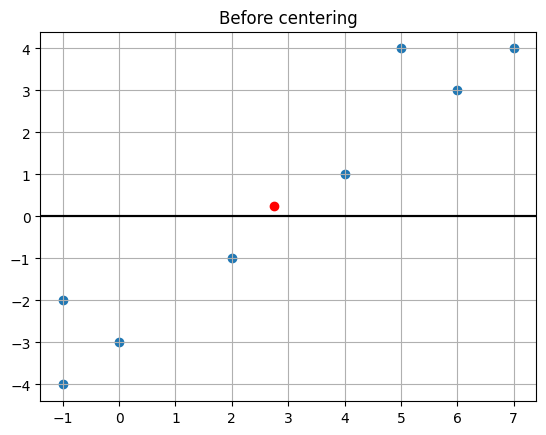

In [16]:
scatterplot(X, "Before centering")

## Step 1: Center the dataset

In [19]:
def center(X):
    return X - X.mean(axis = 1).reshape(2,1)

d, n = X.shape
print(d, n)
X_centered = center(X)
print(X_centered)

2 8
[[ 1.25  2.25  3.25  4.25 -0.75 -3.75 -2.75 -3.75]
 [ 0.75  3.75  2.75  3.75 -1.25 -2.25 -3.25 -4.25]]


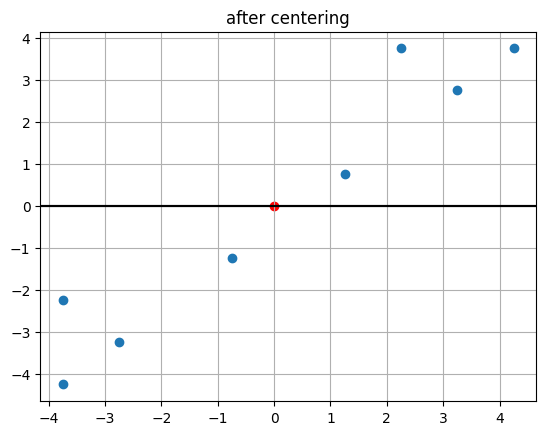

In [18]:
scatterplot(X_centered, "after centering")

## Step 2: Calculate the covariance matrix

In [ ]:
def covariance(X):
    return X @ X.T / X.shape[1] # this is X multiplied by its transponse divided by number of datapoints

C = covariance(X_centered)
d = C.shape[0]
print(C)
print(d)

[[8.9375 8.5625]
 [8.5625 8.9375]]
2


## Step 3: Compute the eigenvectors and eigenvalues

In [33]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
print("Eigen values", eigenvalues)
print("Eigen vectors:", eigenvectors)

# kth principal component is given by the eigen vector corresponding to the kth largest eigenvalue
w1, w2 = eigenvectors[:, -1], eigenvectors[:,-2]



# we need to reshape it

w1 = w1.reshape(w1.shape[0],1)
w2 = w2.reshape(w2.shape[0],1)
print("W1", w1)
print("w2", w2)


Eigen values [ 0.375 17.5  ]
Eigen vectors: [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
W1 [[0.70710678]
 [0.70710678]]
w2 [[-0.70710678]
 [ 0.70710678]]


## Reconstruction using two PCs

(X_centered.T @ w1).reshape(1, n) is called the scaler projection     
w1 @ (X_centered.T @ w1).reshape(1, n) is called the vector projection

In [36]:
# we reconstruct the centered dataset by using PCs 
w1 @ (X_centered.T @ w1).reshape(1, n) + w2 @ (X_centered.T @ w2).reshape(1, n)

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

Let us see the reconstruction error for a point along the first principal component

In [ ]:
# reconstruction error by the first PC
X_1 = np.array((1.25, 0.75)) 
p1 = X_centered[:,0]

# Let the reconstruction of the first point using first PC is given by
p2 = w1 @ (X_1 @ w1)
print("The reconstruction error with first PC is "+ str(np.sum(np.square(p1-p2))))

The reconstruction error with first PC is 0.125


## Step 4: Reconstruction error 

In [42]:
# for the entire dataset 
rec_error1 = np.square(np.linalg.norm(X_centered[:,] - (w1 @ (X_centered.T @ w1).reshape(1,n))[:,], axis = 0))
print(rec_error1)

[0.125 1.125 0.125 0.125 0.125 1.125 0.125 0.125]


In [44]:
# Total reconstruction error considering the first principal component
print("The reconstruction error along the first principal component is :"+str(np.round((rec_error1).mean(), 4)))

The reconstruction error along the first principal component is :0.375


In [45]:
wr = np.array([0, 1]).reshape(-1, 1)

In [48]:
# reconstruction error considering the vector wr
rec_errorr = np.square(np.linalg.norm(X_centered[:,] - (wr @ (X_centered.T @ wr).reshape(1, n))[:,], axis = 0))

In [51]:
print("The reconstruction error along wr is:"+str((rec_errorr).mean()))

The reconstruction error along wr is:8.9375


## Find the optimal value of K

In [52]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
eigenvalues = eigenvalues[::-1] # sorting the eigen values in desceding order

In [55]:
def var_thresh(k):
    total_variance= 0
    required_variance = 0
    for x in eigenvalues:
        total_variance += x 
    for y in range(k):
        required_variance += eigenvalues[y]
    return (required_variance/total_variance)

for i in range(d+1):
    print("The explained variance when K is is "+ str(i)+ " is "+str(np.round(var_thresh(i), 4)))

The explained variance when K is is 0 is 0.0
The explained variance when K is is 1 is 0.979
The explained variance when K is is 2 is 1.0
